In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

In [2]:
data = pd.read_csv('../data/table1.csv')
data.head()

,Tool,Year Published,Notable Features,Programming language,Package manager,Required expertise,Software,Archival Stability
0,a. Data Quality Control and Read Trimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iSeqQC79,2020.0,Expression-based raw data QC tool that detects...,R,NaN,++,https://github.com/gkumar09/iSeqQC,Stable
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FastQC80,2018.0,Raw data QC tool for for high throughput seque...,"Java, Anaconda",Anaconda,++,http://www.bioinformatics.babraham.ac.uk/proje...,PUF
4,QC381,2014.0,Raw data QC tool detecting batch effect and cr...,"Perl, R",Anaconda,++,https://github.com/slzhao/QC3,Stable


In [3]:
data['Year Published'].value_counts()

2014.0    41
2013.0    25
2015.0    23
2012.0    21
2011.0    20
2019.0    12
2010.0    10
2016.0    10
2018.0     9
2017.0     7
2009.0     3
2008.0     2
2020.0     1
Name: Year Published, dtype: int64

In [4]:
data['Required expertise'].value_counts()

+++    90
++     84
+       5
++      1
Name: Required expertise, dtype: int64

In [5]:
data['Archival Stability'].value_counts()

Stable       105
PUF           59
Unstable       6
Unstable       6
Stable         5
PUF            3
Name: Archival Stability, dtype: int64

In [6]:
(data['Package manager']=='').sum()

0

In [7]:
data['Package manager'].value_counts()

Anaconda                   47
Anaconda, Bioconductor     15
Anaconda                    2
Anaconda, Bioconductor      2
Anaconda,CRAN               1
Bioconductor, CRAN          1
Anaconda, CRAN              1
Anaconda,Bioconductor       1
Bioconductor                1
Name: Package manager, dtype: int64

# Cumulative graph

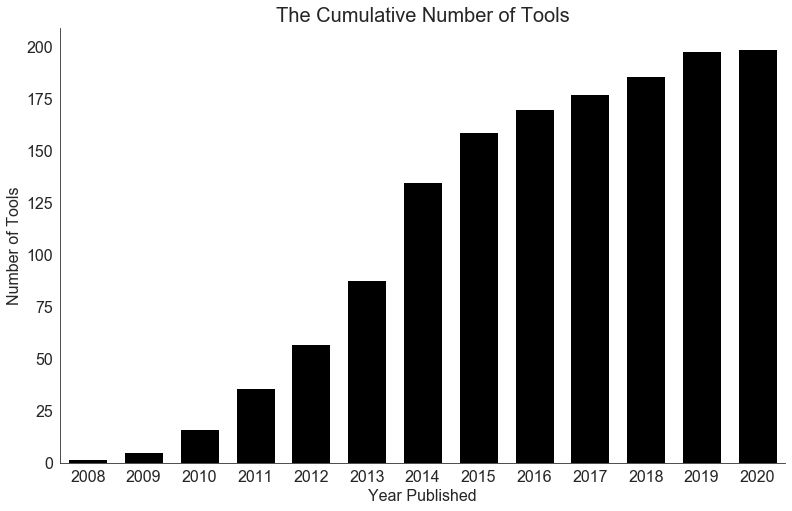

In [8]:
#Read in data & create total column
bar_data = pd.read_csv("../data/catyear.csv")
bar_data["total"] = bar_data.cumulation

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (13, 8)})

#Plot 1 - background - "total" 
g=sns.barplot(x = bar_data.Year_Published, y = bar_data.total, color = "black")
plt.ylabel("Number of Tools")
plt.xlabel("Year Published")
plt.title("The Cumulative Number of Tools", fontsize = 20)
sns.despine()

for item in ([g.xaxis.label, g.yaxis.label] +
             g.get_xticklabels() + g.get_yticklabels()):
    item.set_fontsize(16)
def change_width(g, new_value) :
    for patch in g.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .7)

#plt.savefig('../figures/figure1.png', bbox_inches='tight')

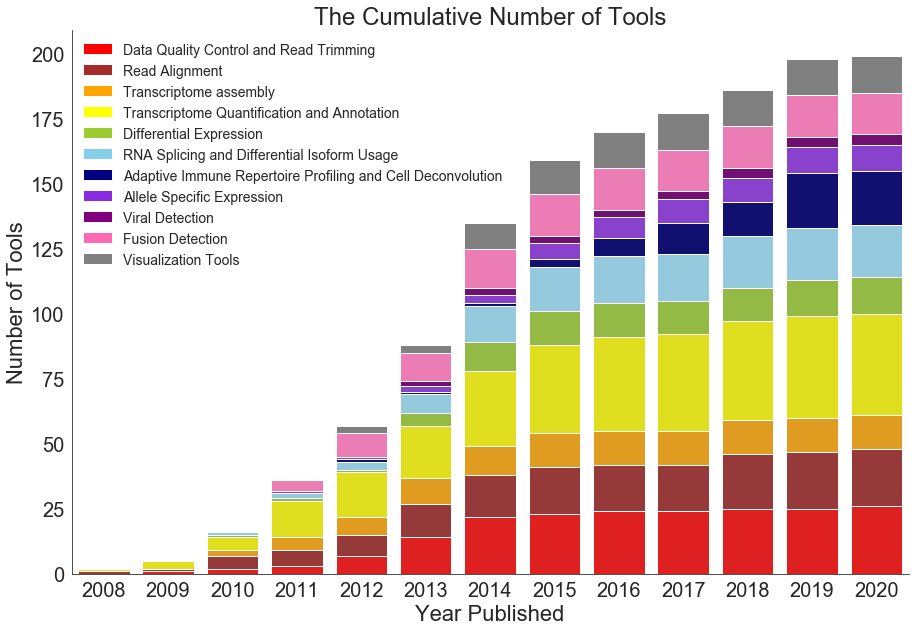

In [9]:
stacked_bar_data = pd.read_csv("../data/catyear.csv")
stacked_bar_data["total"] = stacked_bar_data.cumulation
stacked_bar_data["j"] = stacked_bar_data.cumulation-stacked_bar_data.K
stacked_bar_data["i"] = stacked_bar_data.j-stacked_bar_data.J
stacked_bar_data["h"] = stacked_bar_data.i-stacked_bar_data.I
stacked_bar_data["g"] = stacked_bar_data.h-stacked_bar_data.H
stacked_bar_data["f"] = stacked_bar_data.g-stacked_bar_data.G
stacked_bar_data["e"] = stacked_bar_data.f-stacked_bar_data.F
stacked_bar_data["d"] = stacked_bar_data.e-stacked_bar_data.E
stacked_bar_data["c"] = stacked_bar_data.d-stacked_bar_data.D
stacked_bar_data["b"] = stacked_bar_data.c-stacked_bar_data.C
stacked_bar_data["a"] = stacked_bar_data.b-stacked_bar_data.B

sns.set_style("white")
sns.set_context({"figure.figsize": (15, 10)})

#Plot 
k = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.total, color="grey")
j = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.j, color="hotpink")
i = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.i, color="purple")
h = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.h, color="blueviolet")
g = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.g, color="navy")
f = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.f, color="skyblue")
e = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.e, color="yellowgreen")
d = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.d, color="yellow")
c = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.c, color="orange")
b = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.b, color="brown")
a = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.a, color="red")

k = plt.Rectangle((0,0),1,1,fc="grey", edgecolor = 'none')
j = plt.Rectangle((0,0),1,1,fc='hotpink',  edgecolor = 'none')
i = plt.Rectangle((0,0),1,1,fc='purple',  edgecolor = 'none')
h = plt.Rectangle((0,0),1,1,fc='blueviolet',  edgecolor = 'none')
g = plt.Rectangle((0,0),1,1,fc='navy',  edgecolor = 'none')
f = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
e = plt.Rectangle((0,0),1,1,fc='yellowgreen',  edgecolor = 'none')
d = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
c = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
b = plt.Rectangle((0,0),1,1,fc='brown',  edgecolor = 'none')
a = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')

legend=plt.legend([a,b,c,d,e,f,g,h,i,j,k], ['Data Quality Control and Read Trimming','Read Alignment',
                                             'Transcriptome assembly','Transcriptome Quantification and Annotation',
                                             'Differential Expression','RNA Splicing and Differential Isoform Usage',
                                             'Adaptive Immune Repertoire Profiling and Cell Deconvolution',
                                             'Allele Specific Expression','Viral Detection','Fusion Detection',
                                             'Visualization Tools'],
               loc='best', prop={'size':14})
legend.draw_frame(False)
plt.ylabel("Number of Tools",fontsize = 22)
plt.xlabel("Year Published",fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Cumulative Number of Tools",fontsize=24)
sns.despine()

plt.savefig('../figures/figure7a.png', bbox_inches='tight')

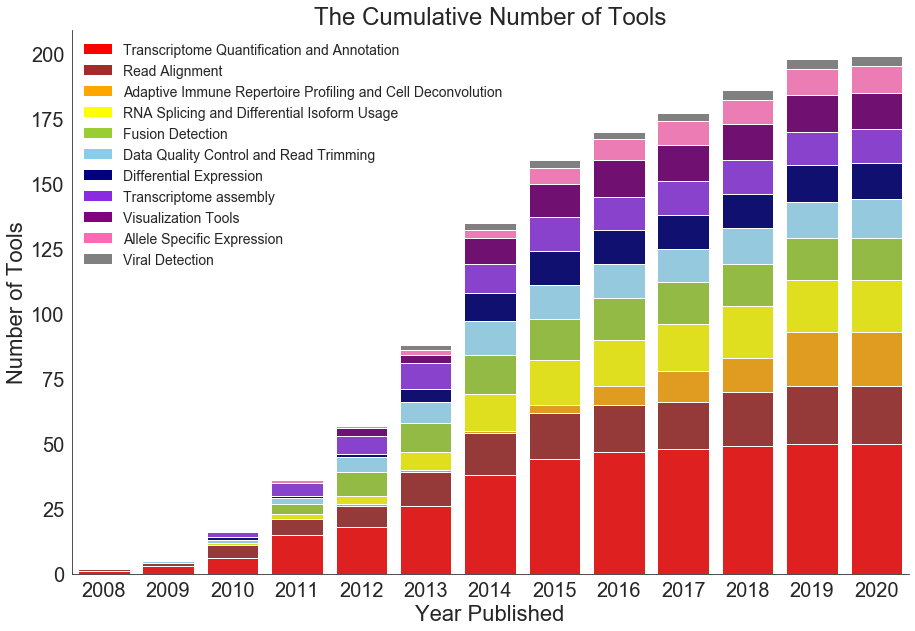

In [10]:
stacked_bar_data = pd.read_csv("../data/catyear.csv")
stacked_bar_data["total"] = stacked_bar_data.cumulation
stacked_bar_data["h"] = stacked_bar_data.cumulation-stacked_bar_data.I
stacked_bar_data["k"] = stacked_bar_data.h-stacked_bar_data.H
stacked_bar_data["c"] = stacked_bar_data.k-stacked_bar_data.K
stacked_bar_data["e"] = stacked_bar_data.c-stacked_bar_data.C
stacked_bar_data["a"] = stacked_bar_data.e-stacked_bar_data.E
stacked_bar_data["j"] = stacked_bar_data.a-stacked_bar_data.A
stacked_bar_data["f"] = stacked_bar_data.j-stacked_bar_data.J
stacked_bar_data["g"] = stacked_bar_data.f-stacked_bar_data.F
stacked_bar_data["b"] = stacked_bar_data.g-stacked_bar_data.G
stacked_bar_data["d"] = stacked_bar_data.b-stacked_bar_data.B

sns.set_style("white")
sns.set_context({"figure.figsize": (15, 10)})

#Plot 
i = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.total, color="grey")
h = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.h, color="hotpink")
k = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.k, color="purple")
c = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.c, color="blueviolet")
e = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.e, color="navy")
a = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.a, color="skyblue")
j = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.j, color="yellowgreen")
f = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.f, color="yellow")
g = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.g, color="orange")
b = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.b, color="brown")
d = sns.barplot(x = stacked_bar_data.Year_Published, y = stacked_bar_data.d, color="red")

i = plt.Rectangle((0,0),1,1,fc="grey", edgecolor = 'none')
h = plt.Rectangle((0,0),1,1,fc='hotpink',  edgecolor = 'none')
k = plt.Rectangle((0,0),1,1,fc='purple',  edgecolor = 'none')
c = plt.Rectangle((0,0),1,1,fc='blueviolet',  edgecolor = 'none')
e = plt.Rectangle((0,0),1,1,fc='navy',  edgecolor = 'none')
a = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
j = plt.Rectangle((0,0),1,1,fc='yellowgreen',  edgecolor = 'none')
f = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
g = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
b = plt.Rectangle((0,0),1,1,fc='brown',  edgecolor = 'none')
d = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')

legend=plt.legend([d,b,g,f,j,a,e,c,k,h,i], ['Transcriptome Quantification and Annotation','Read Alignment',
                                            'Adaptive Immune Repertoire Profiling and Cell Deconvolution',
                                            'RNA Splicing and Differential Isoform Usage',
                                            'Fusion Detection','Data Quality Control and Read Trimming',
                                            'Differential Expression','Transcriptome assembly',
                                            'Visualization Tools','Allele Specific Expression',
                                            'Viral Detection'],
               loc='best', prop={'size':14})
legend.draw_frame(False)
plt.ylabel("Number of Tools",fontsize = 22)
plt.xlabel("Year Published",fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Cumulative Number of Tools",fontsize=24)
sns.despine()

plt.savefig('../figures/figure7aa.png', bbox_inches='tight')

# Domain-based required expertise

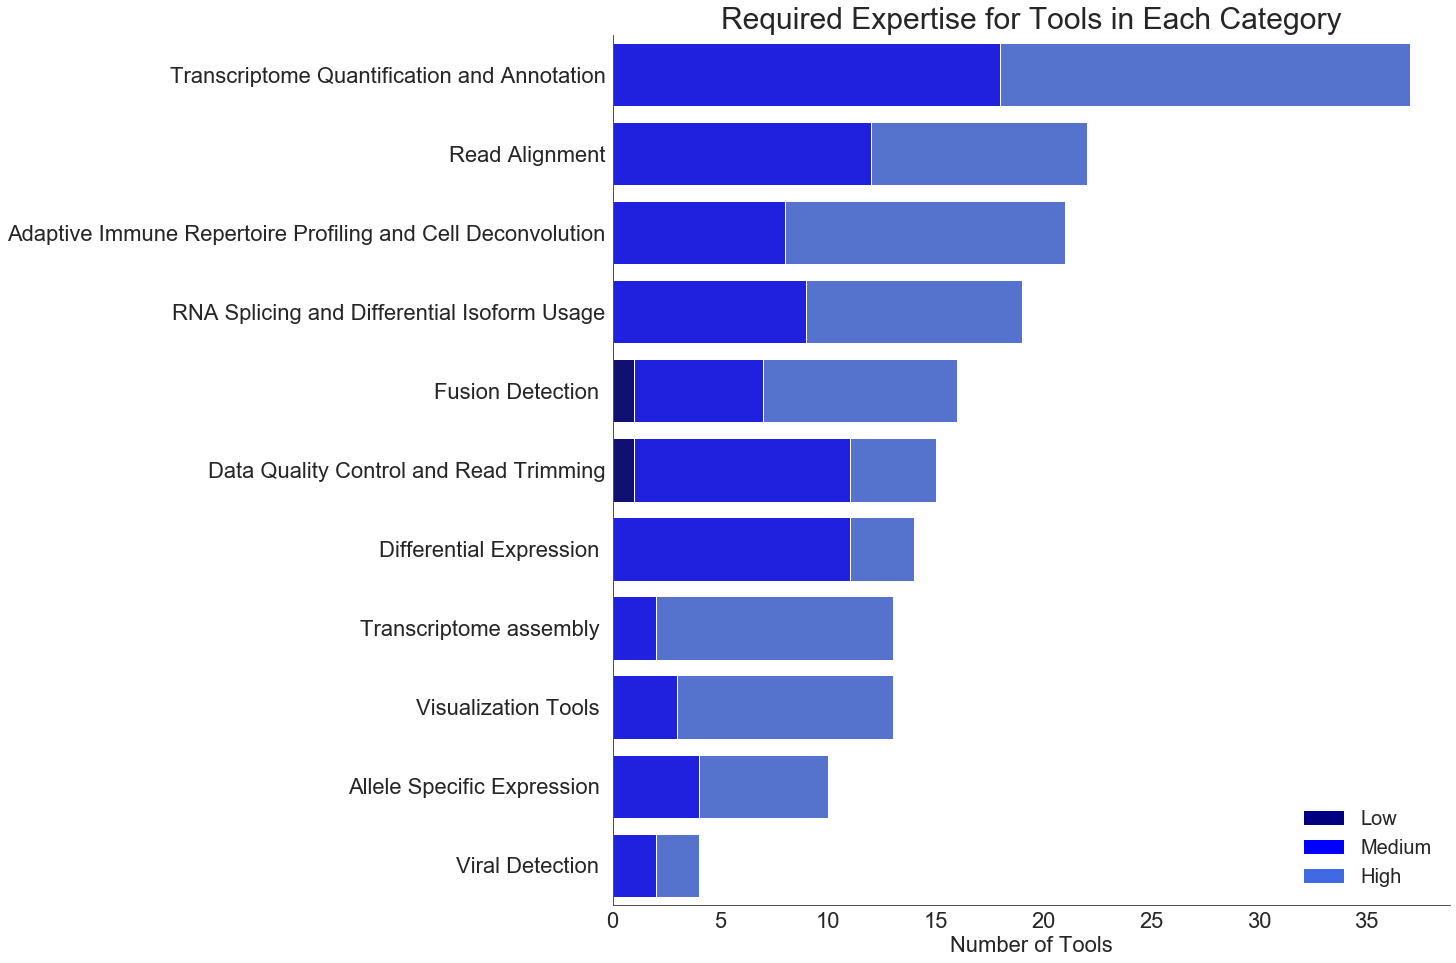

In [11]:
#Read in data & create total column
stacked_bar_data = pd.read_csv("../data/required_expertise.csv")
stacked_bar_data["total"] = stacked_bar_data.easy + stacked_bar_data.medium + stacked_bar_data.hard

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (15, 16)})

#Plot 1 - background - "total" (top)
top_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "royalblue")

#Plot 2 - overlay - "medium" 
medium_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.medium + stacked_bar_data.easy, 
                          color = "b")

#Plot3 - overlay - "bottom"
bottom_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.easy, color = "navy")


topbar = plt.Rectangle((0,0),1,1,fc="royalblue", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="navy", edgecolor = 'none')
l = plt.legend([bottombar, mediumbar, topbar], ['Low', 'Medium', 'High'], loc='best', prop={'size':20})
l.draw_frame(False)
plt.title("Required Expertise for Tools in Each Category", fontsize = 30)

sns.despine()
bottom_plot.set_xlabel("Number of Tools")
bottom_plot.set_ylabel("")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] ):
    item.set_fontsize(22)
for items in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    items.set_fontsize(22)
    

#plt.savefig('../figures/figure2.png', bbox_inches='tight', pad_inches=.5)

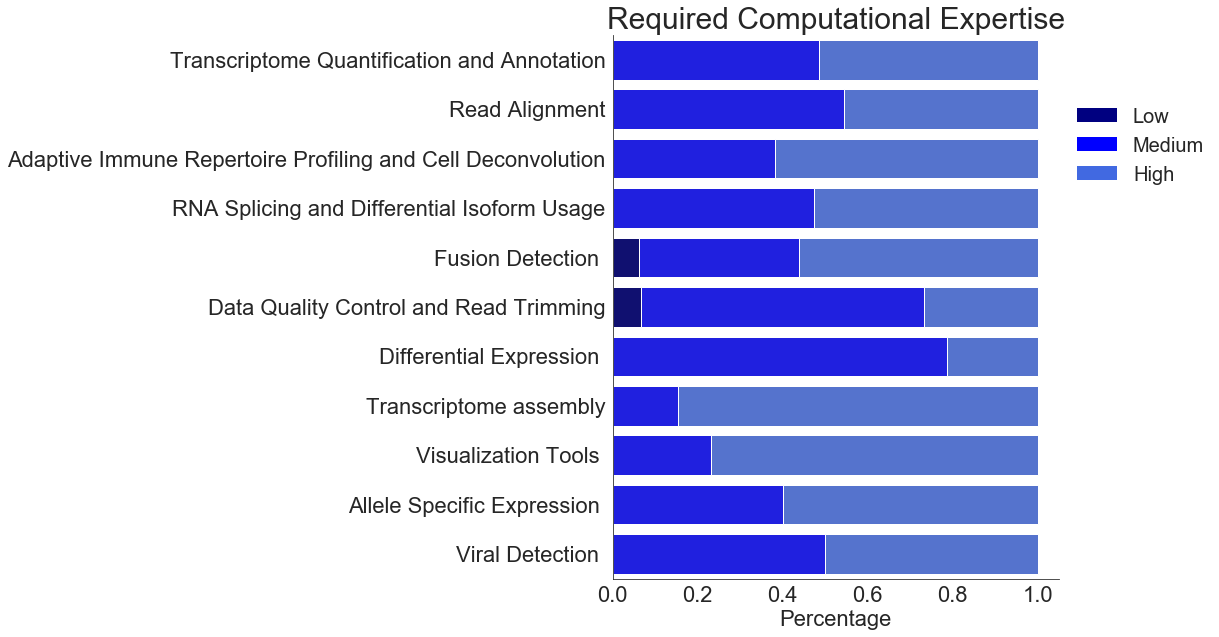

In [12]:
stacked_bar_data = pd.read_csv("../data/expertise_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot 1 - background - "total" (top)
top_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "royalblue")

#Plot 2 - overlay - "medium" 
medium_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.medium + stacked_bar_data.easy, 
                          color = "b")

#Plot3 - overlay - "bottom"
bottom_plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.easy, color = "navy")


topbar = plt.Rectangle((0,0),1,1,fc="royalblue", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc="navy", edgecolor = 'none')
l = plt.legend([bottombar, mediumbar, topbar], ['Low','Medium','High'],bbox_to_anchor=(1, .9),prop={'size':20})
l.draw_frame(False)
plt.title("Required Computational Expertise", fontsize = 30)

sns.despine()
bottom_plot.set_xlabel("Percentage")
bottom_plot.set_ylabel("")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] ):
    item.set_fontsize(22)
for items in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    items.set_fontsize(22)
    

plt.savefig('../figures/figure7c.png', bbox_inches='tight', pad_inches=.5)

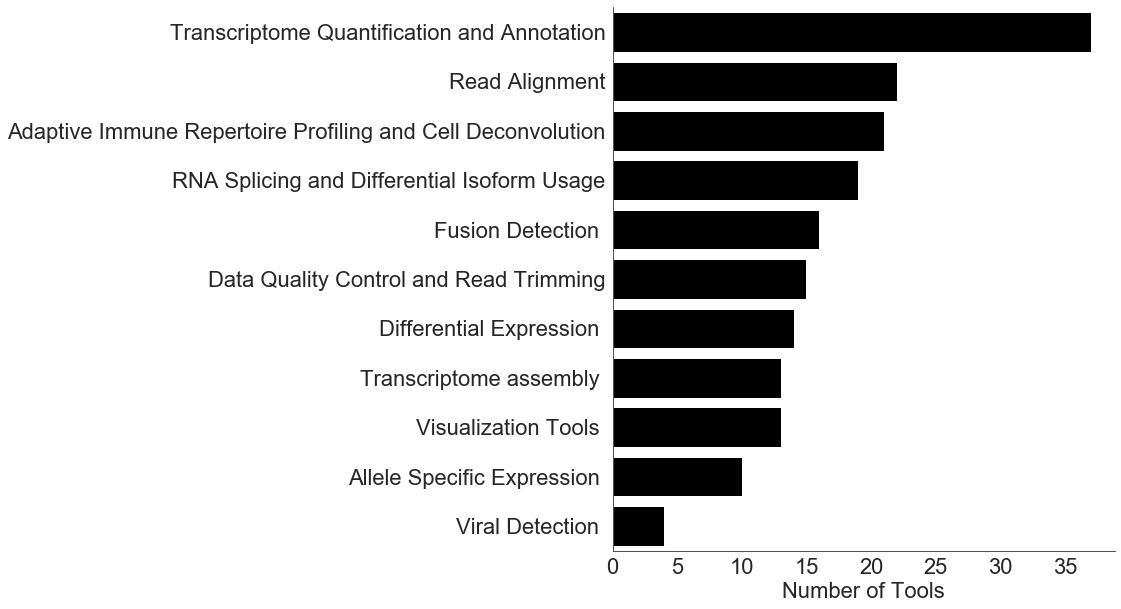

In [13]:
stacked_bar_data = pd.read_csv("../data/required_expertise.csv")
stacked_bar_data["total"] = stacked_bar_data.easy + stacked_bar_data.medium + stacked_bar_data.hard

sns.set_style("white")
sns.set_context({"figure.figsize": (9, 10)})

plot = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "black")

plt.xlabel("Number of Tools",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title("Number of Tools in Each Category", fontsize=30)
sns.despine()
plt.savefig('../figures/figure7b.png', bbox_inches='tight', pad_inches=.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

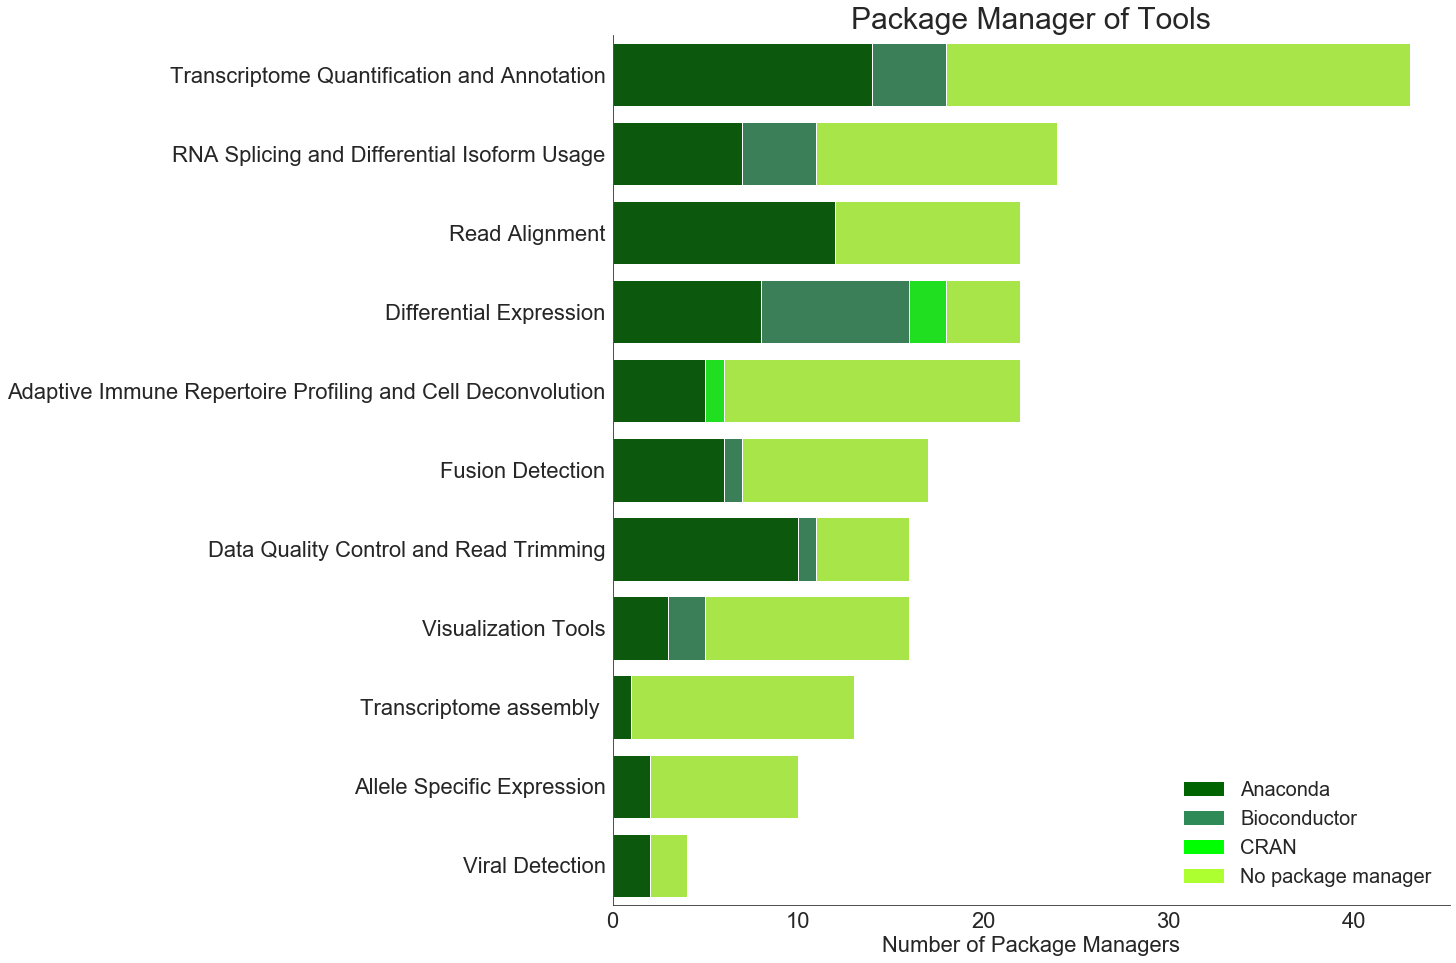

In [14]:
stacked_bar_data = pd.read_csv("../data/package.csv")
stacked_bar_data["total"] = stacked_bar_data.Anaconda + stacked_bar_data.Bioconductor + stacked_bar_data.CRAN + stacked_bar_data.none

sns.set_style("white")
sns.set_context({"figure.figsize": (15, 16)})

#Plot
total = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "greenyellow")
cran = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total - stacked_bar_data.none, 
                   color = "lime")
bioconductor = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda + stacked_bar_data.Bioconductor, 
                           color = "seagreen")
anaconda = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda, color = "darkgreen")

total = plt.Rectangle((0,0),1,1,fc="greenyellow", edgecolor = 'none')
cran = plt.Rectangle((0,0),1,1,fc='lime',  edgecolor = 'none')
bioconductor = plt.Rectangle((0,0),1,1,fc="seagreen", edgecolor = 'none')
anaconda = plt.Rectangle((0,0),1,1,fc="darkgreen", edgecolor = 'none')
legend = plt.legend([anaconda, bioconductor, cran, total], ['Anaconda','Bioconductor','CRAN','No package manager'], 
                    loc='best', prop={'size':20})
legend.draw_frame(False)
plt.title("Package Manager of Tools", fontsize = 30)

sns.despine()
plt.xlabel("Number of Package Managers",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
    

#plt.savefig('../figures/figure5.png', bbox_inches='tight', pad_inches=.5)

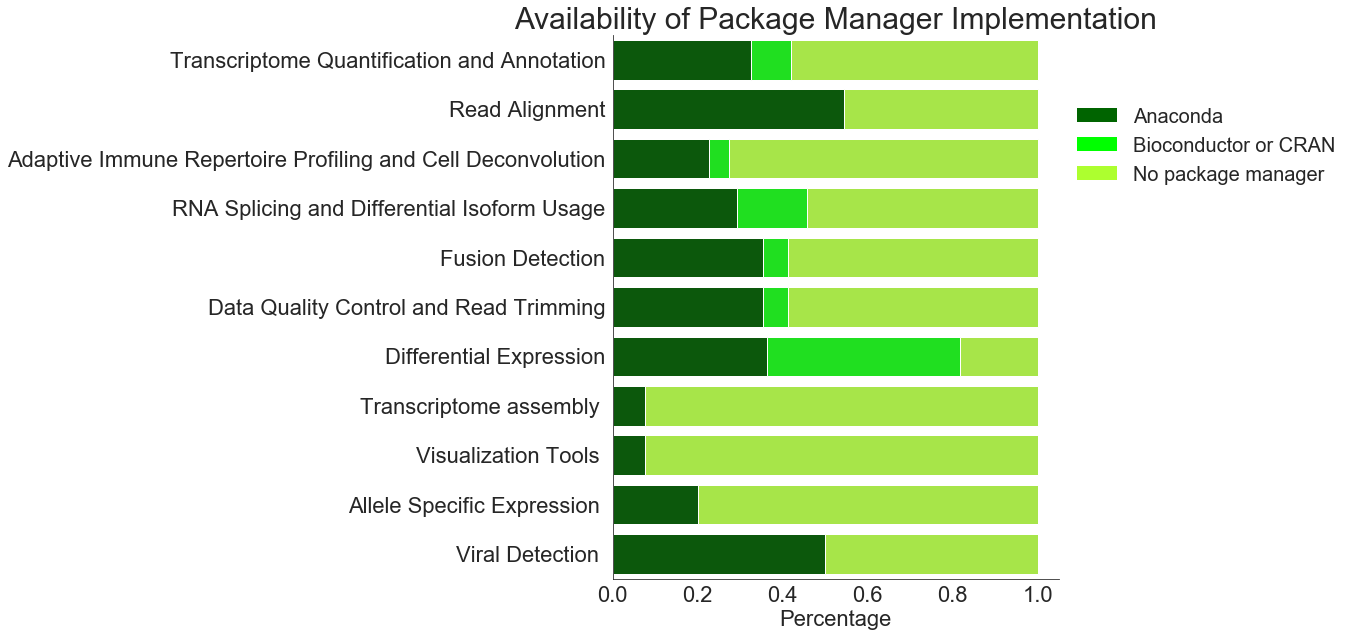

In [15]:
stacked_bar_data = pd.read_csv("../data/package_percent.csv")

sns.set_style("white")
sns.set_context({"figure.figsize": (8, 10)})

#Plot
total = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total, color = "greenyellow")
cran_bio = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.total - stacked_bar_data.none, 
                   color = "lime")
#bioconductor = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda + stacked_bar_data.Bioconductor, 
#                           color = "seagreen")
anaconda = sns.barplot(y = stacked_bar_data.domain_name, x = stacked_bar_data.Anaconda, color = "darkgreen")

total = plt.Rectangle((0,0),1,1,fc="greenyellow", edgecolor = 'none')
cran_bio = plt.Rectangle((0,0),1,1,fc='lime',  edgecolor = 'none')
#bioconductor = plt.Rectangle((0,0),1,1,fc="seagreen", edgecolor = 'none')
anaconda = plt.Rectangle((0,0),1,1,fc="darkgreen", edgecolor = 'none')
legend = plt.legend([anaconda, cran_bio, total], ['Anaconda','Bioconductor or CRAN','No package manager'], 
                    bbox_to_anchor=(1, .9), prop={'size':20})
legend.draw_frame(False)
plt.title("Availability of Package Manager Implementation", fontsize = 30)

sns.despine()
plt.xlabel("Percentage",fontsize=22)
plt.ylabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
    

plt.savefig('../figures/figure7d.png', bbox_inches='tight', pad_inches=.5)

# Pie chart

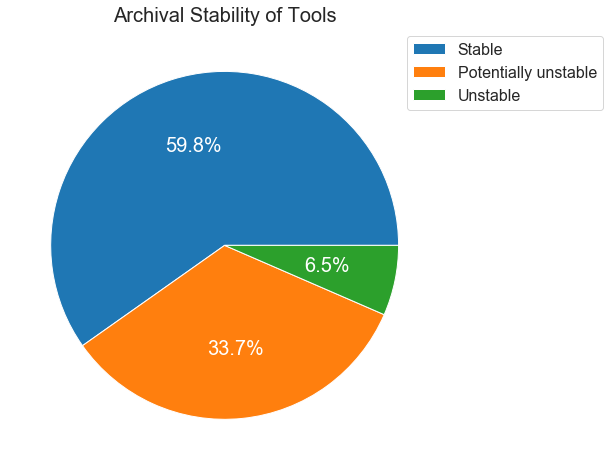

In [16]:
arc_stability = pd.DataFrame({'ratio': [110, 62, 12]}, index=['Stable','Potentially unstable', 'Unstable'])
plot = arc_stability.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.9, 1), fontsize = 16)
plt.ylabel("", color = "black")
plt.title("Archival Stability of Tools", fontsize = 20)
plt.savefig('../figures/figure7g.png',bbox_inches='tight')

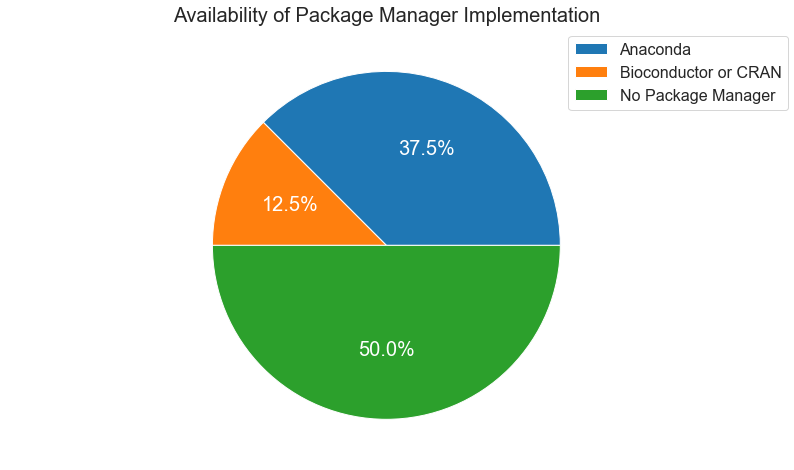

In [17]:
manager = pd.DataFrame({'Package Manager': [69,23,92]}, index=['Anaconda','Bioconductor or CRAN','No Package Manager'])
plot = manager.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"}, 
                              fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.9, 1),fontsize = 16)
plt.ylabel("", color = "black")
plt.title("Availability of Package Manager Implementation", fontsize = 20)
plt.savefig('../figures/figure7f.png',bbox_inches='tight')

# Citations

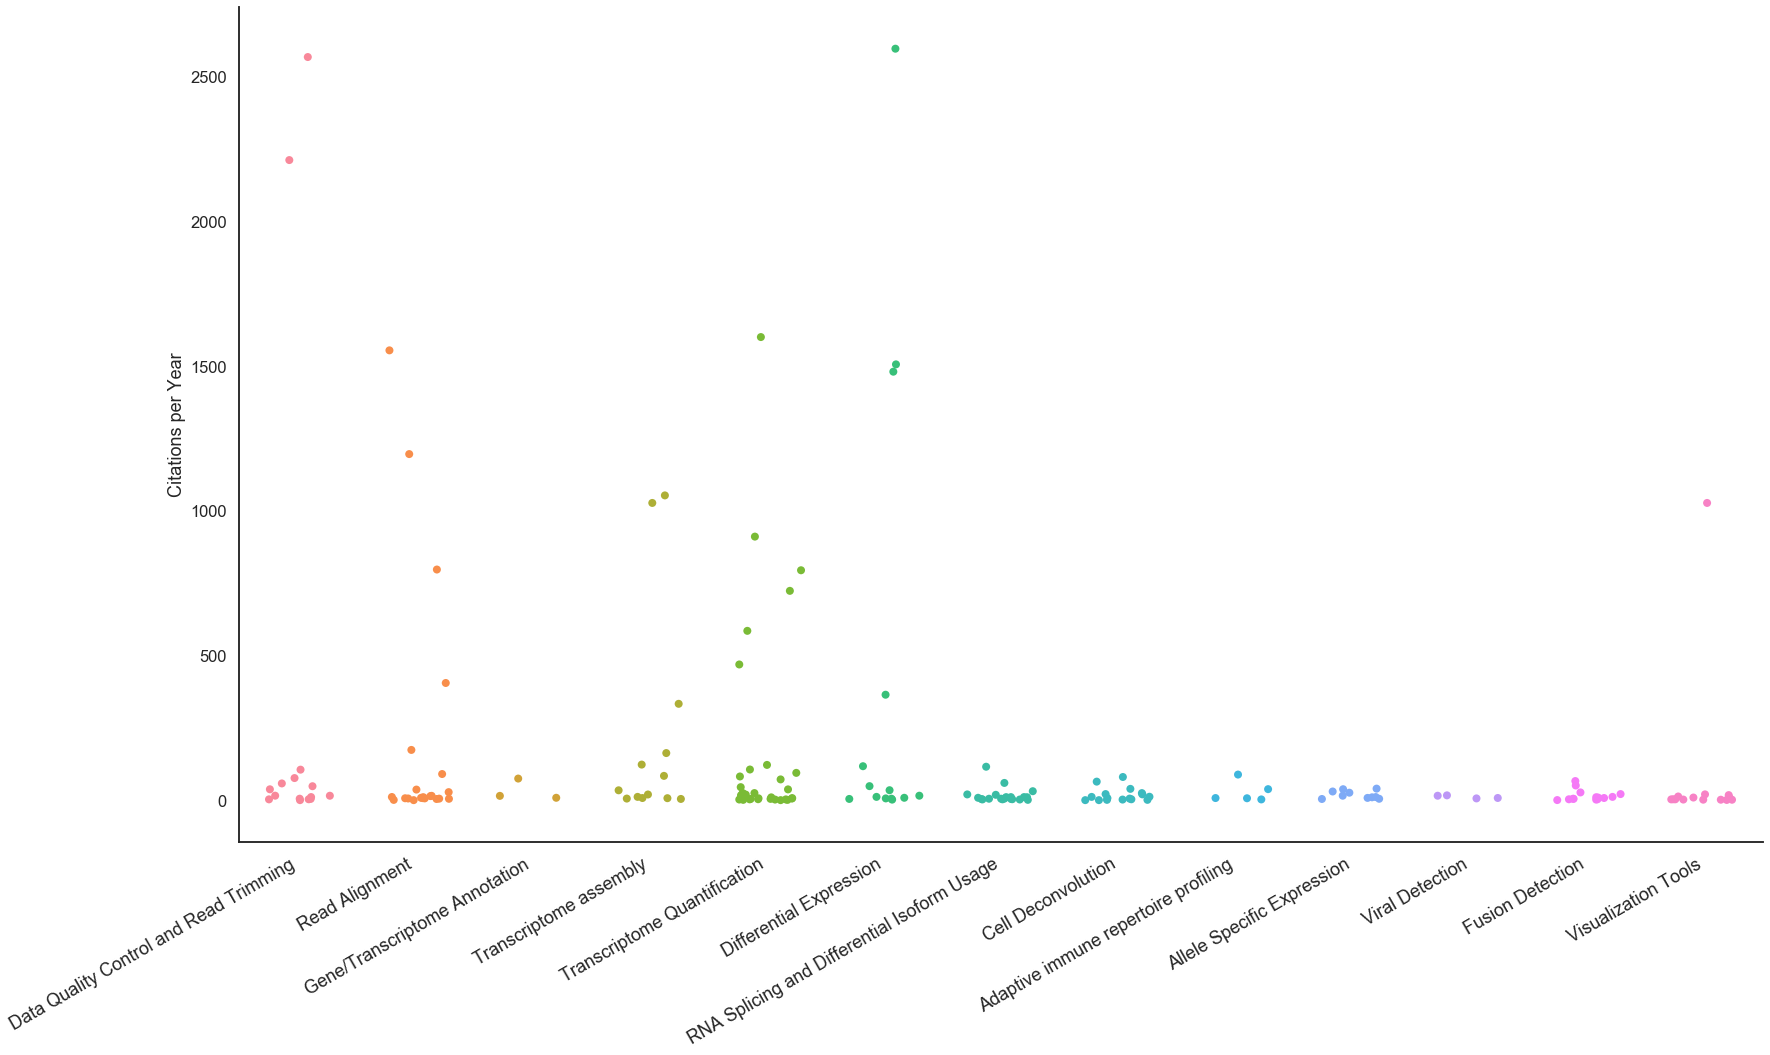

In [18]:
citation=pd.read_csv('../data/citation.csv')
plt.figure(figsize=(25,15))

sns.set_style('white')
sns.set_context('talk')


ax = sns.stripplot(data = citation, x = 'category', y = 'citation_per_year', 
                   order=['Data Quality Control and Read Trimming','Read Alignment','Gene/Transcriptome Annotation', 
                          'Transcriptome assembly','Transcriptome Quantification','Differential Expression',
                          'RNA Splicing and Differential Isoform Usage','Cell Deconvolution',
                          'Adaptive immune repertoire profiling','Allele Specific Expression',
                          'Viral Detection','Fusion Detection','Visualization Tools'],  
                   size=8, jitter=.3)

labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=30, ha="right", fontsize=18)
ax.set(xlabel = '', ylabel = "Citations per Year")
plt.tight_layout()
sns.despine()

plt.savefig('../figures/citation.png', bbox_inches='tight', pad_inches=.5)

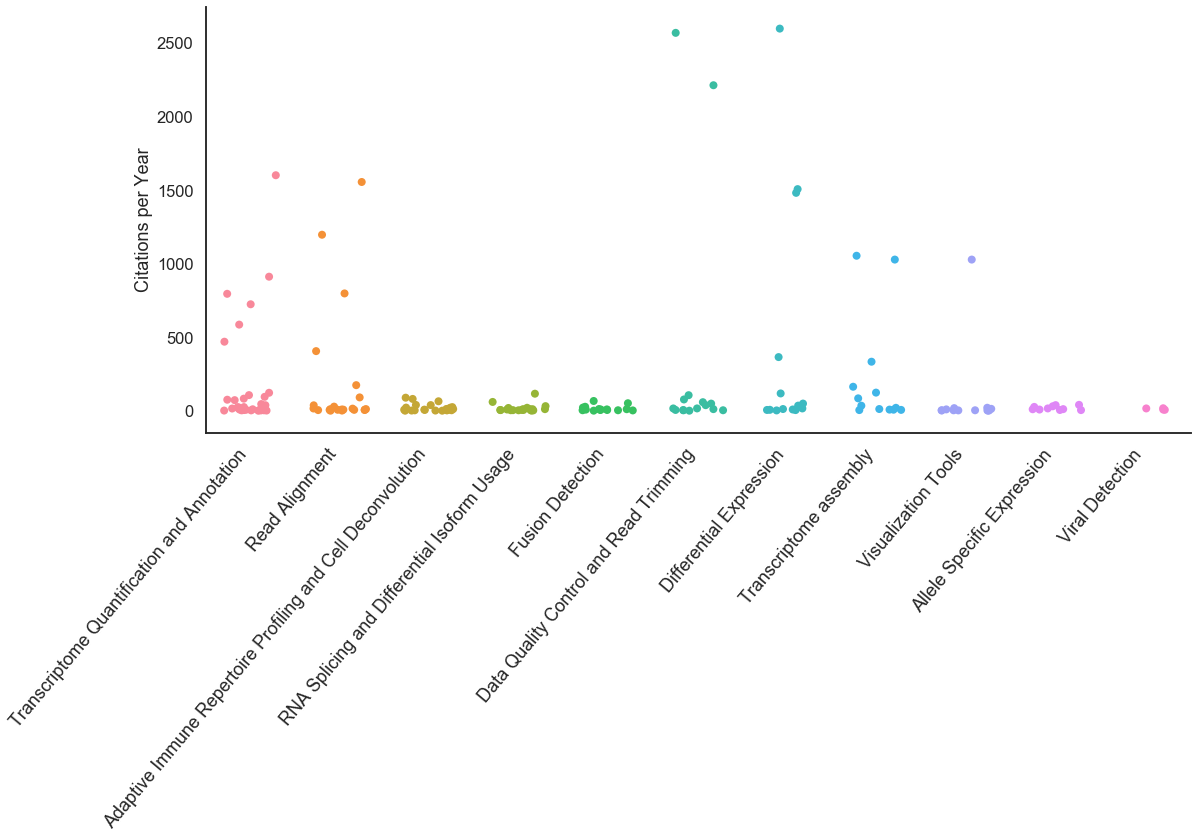

In [21]:
citation=pd.read_csv('../data/citation_sort.csv')
plt.figure(figsize=(17,12))

sns.set_style('white')
sns.set_context('talk')


ax = sns.stripplot(data = citation, x = 'category', y = 'citation_per_year', 
                   order=['Transcriptome Quantification and Annotation','Read Alignment',
                          'Adaptive Immune Repertoire Profiling and Cell Deconvolution', 
                          'RNA Splicing and Differential Isoform Usage','Fusion Detection',
                          'Data Quality Control and Read Trimming',
                          'Differential Expression','Transcriptome assembly',
                          'Visualization Tools','Allele Specific Expression',
                          'Viral Detection'],  
                   size=8, jitter=.3)

labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=50, ha="right", fontsize=18)
ax.set(xlabel = '', ylabel = "Citations per Year")
plt.tight_layout()
sns.despine()

#plt.savefig('../figures/citation_sort.png', bbox_inches='tight', pad_inches=.5)

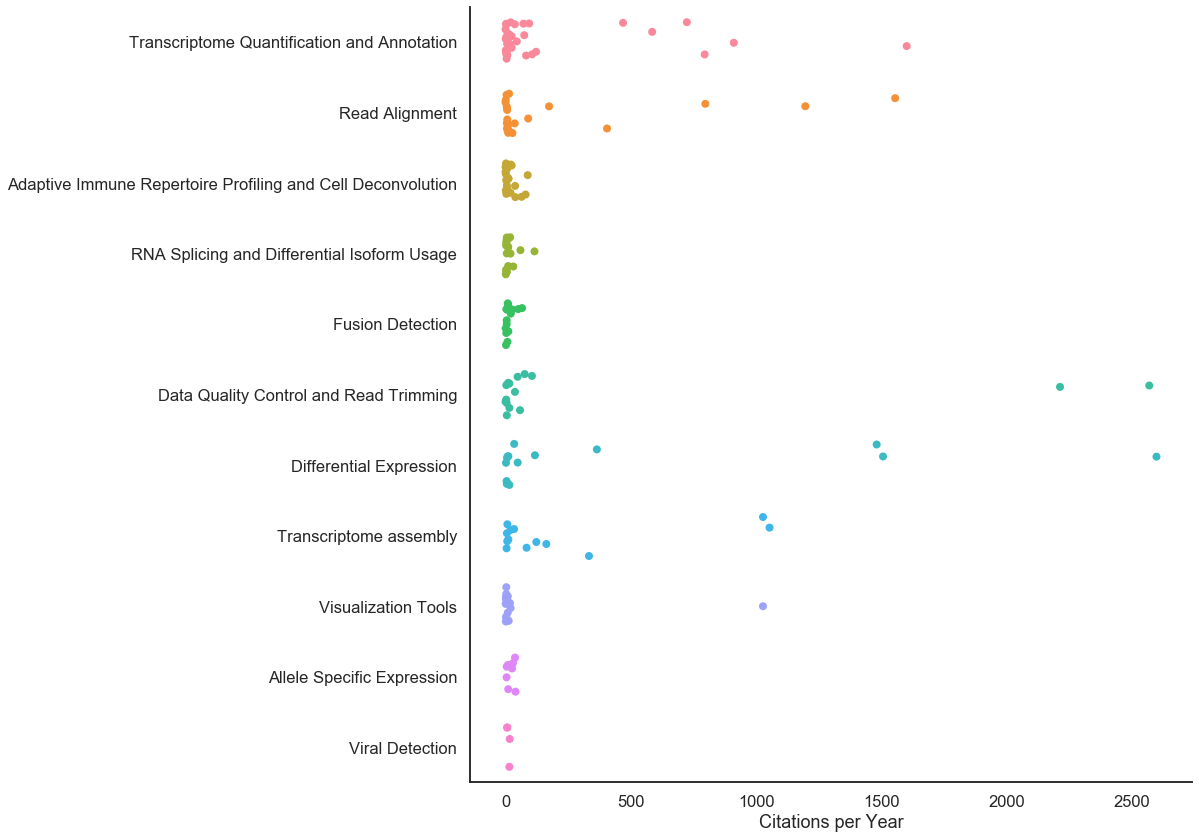

In [20]:
citation=pd.read_csv('../data/citation_sort.csv')
plt.figure(figsize=(17,12))

sns.set_style('white')
sns.set_context('talk')


ax = sns.stripplot(data = citation, y = 'category', x = 'citation_per_year', 
                   order=['Transcriptome Quantification and Annotation','Read Alignment',
                          'Adaptive Immune Repertoire Profiling and Cell Deconvolution', 
                          'RNA Splicing and Differential Isoform Usage','Fusion Detection',
                          'Data Quality Control and Read Trimming',
                          'Differential Expression','Transcriptome assembly',
                          'Visualization Tools','Allele Specific Expression',
                          'Viral Detection'],  
                   size=8, jitter=.3)

labels = ax.get_xticklabels()
#ax.set_xticklabels(labels, rotation=50, ha="right", fontsize=18)
ax.set(ylabel = '', xlabel = "Citations per Year")
plt.tight_layout()
sns.despine()

plt.savefig('../figures/citation_sort.png', bbox_inches='tight', pad_inches=.5)